# K Means Algorithm

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
k = 3
X = pd.read_csv('kmeans.csv',index_col=False)
print(X)

    X1   X2
0  5.9  3.2
1  4.6  2.9
2  6.2  2.8
3  4.7  3.2
4  5.5  4.2
5  5.0  3.0
6  4.9  3.1
7  6.7  3.1
8  5.1  3.8
9  6.0  3.0


In [3]:
x1 = X['X1'].values
x2 = X['X2'].values
X = np.array(list(zip(x1, x2)))
print(X)

[[5.9 3.2]
 [4.6 2.9]
 [6.2 2.8]
 [4.7 3.2]
 [5.5 4.2]
 [5.  3. ]
 [4.9 3.1]
 [6.7 3.1]
 [5.1 3.8]
 [6.  3. ]]


<function matplotlib.pyplot.show(close=None, block=None)>

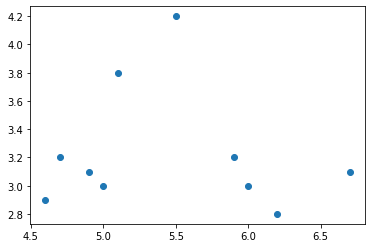

In [4]:
plt.scatter(x1, x2)
plt.show

In [5]:
C_x = [6.2, 6.6 ,6.5]
C_y = [3.2, 3.7, 3.0]
Centroid = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(Centroid.shape)

Centroid_old = np.zeros(Centroid.shape)
print(Centroid_old)

Initial Centroids
(3, 2)
[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [6]:
def euclidean(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [7]:
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
print("Clusters: ", clusters)
error = euclidean(Centroid, Centroid_old, None)
print("Error is: ", error, "\n")
iterr = 0

# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    iterr = iterr + 1
    for i in range(len(X)):
        #print(X[i])
        distances = euclidean(X[i], Centroid)
        #print(distances)
        cluster = np.argmin(distances)
        clusters[i] = cluster

    Centroid_old = deepcopy(Centroid)

    # Finding the new centroids by taking the Mean
    for p in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == p]
        Centroid[p] = np.mean(points, axis=0)

    print(" Centre of the clusters after ", iterr," Iteration \n", Centroid)
    error = euclidean(Centroid, Centroid_old, None)
    print("Error  ... ", error, "\n")

    print(clusters)

Clusters:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error is:  12.537144692236463 

 Centre of the clusters after  1  Iteration 
 [[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
Error  ...  1.5886391 

[0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
 Centre of the clusters after  2  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error  ...  0.5484787 

[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
 Centre of the clusters after  3  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error  ...  0.0 

[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]


In [8]:
print(clusters)

[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]


[[4.6 2.9]
 [4.7 3.2]
 [5.  3. ]
 [4.9 3.1]]


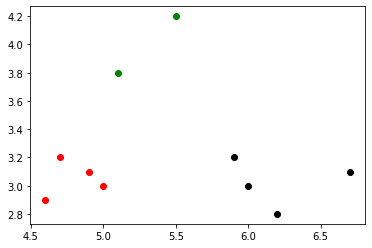

In [9]:
fl0 = X[clusters==0]
fl1 = X[clusters==1]
fl2 = X[clusters==2]

#print(fl0)

plt.scatter(fl0[:,0] , fl0[:,1], color="red")
plt.scatter(fl1[:,0] , fl1[:,1], color="green")
plt.scatter(fl2[:,0] , fl2[:,1], color="black")

plt.show()